# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [29]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from cycler import cycler

In [83]:
plt.style.use('default')

## Challenge 1

#### The data we will use in this challenge is:

In [42]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

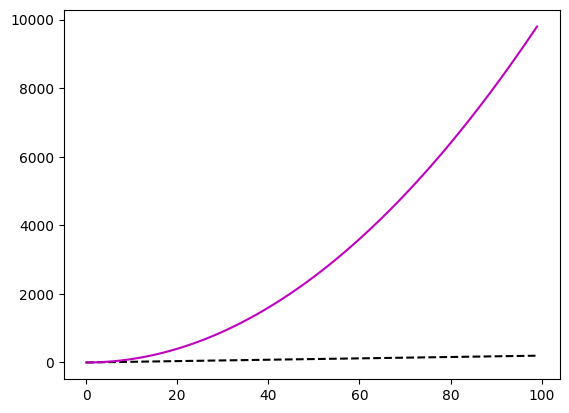

In [43]:
# Not recomended method w matplotlib
plt.plot(x,y , 'k--', x,z, 'm-')

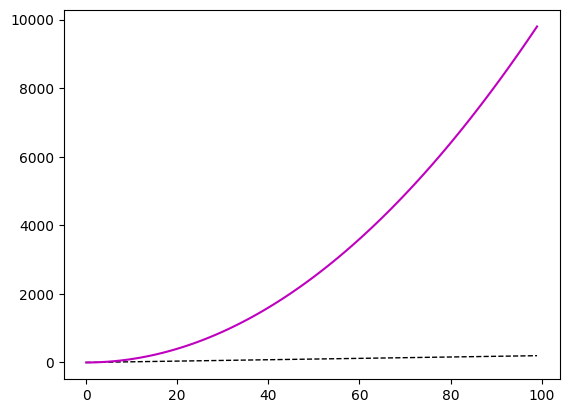

In [44]:
plt.plot(x,y, 'k--', label='line 1', linewidth=1)
plt.plot(x,z, 'm-',  label='line 2')

plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

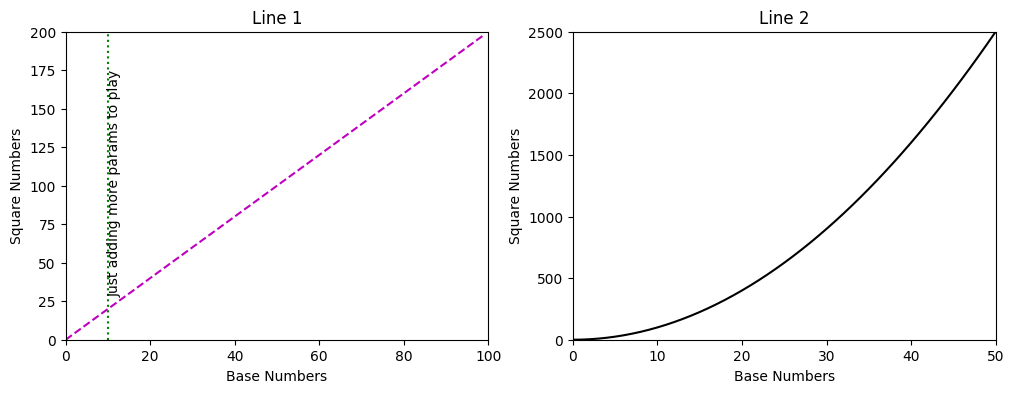

In [45]:
# Recomended method w matplotlib
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
ax[0].set_title('Line 1')
ax[0].plot(x, y, color = 'm', ls='--')
ax[0].set(xlim= [0,100],
          ylim= [0,200],
          xlabel= 'Base Numbers',
          ylabel= 'Square Numbers')

ax[0].axvline(10, ls=':', color='g')
ax[0].text(10,30, 'Just adding more params to play', rotation=90)


ax[1].set_title('Line 2')
ax[1].plot(x, z, color='k', ls='-')
ax[1].set(xlim= [0,50],
          ylim= [0,2500],
          xlabel= 'Base Numbers',
          ylabel= 'Square Numbers')


plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

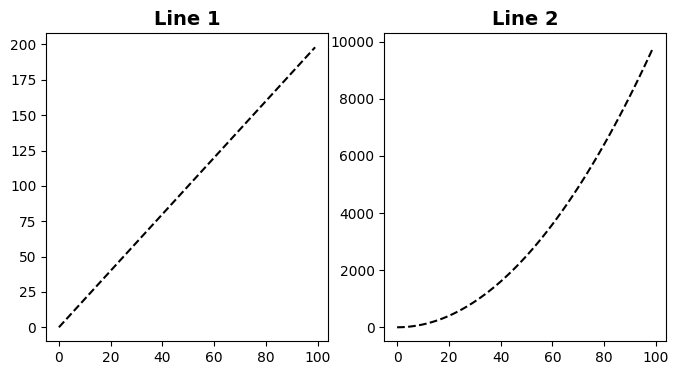

In [46]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,4))
ax[0].set_title('Line 1', fontsize=14, fontweight='bold')
ax[0].plot(x, y, color = 'k', ls='--')


ax[1].set_title('Line 2', fontsize=14, fontweight='bold')
ax[1].plot(x, z, color='k', ls='--')

plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

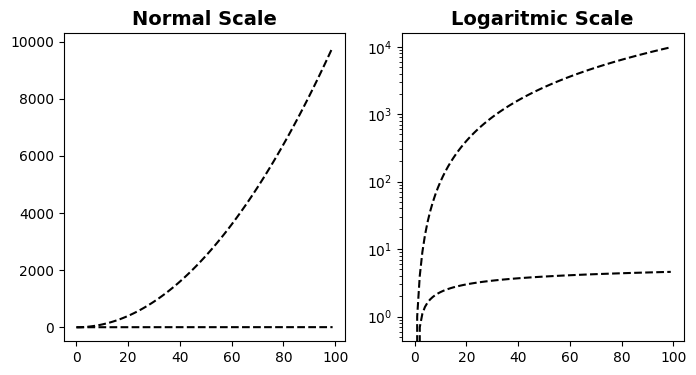

In [47]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,4))

ax[0].set_xscale('linear')
ax[0].set_yscale('linear')
ax[0].set_title('Normal Scale', fontsize=14, fontweight='bold')
ax[0].plot(x, x**2, c= 'k', ls='--', label= r'f(x)=x²')
ax[0].plot(x, np.log(x, where= x>0), c='k', ls='--', label= r'f(x)=e^x') 

ax[1].set_xscale('linear')
ax[1].set_yscale('log')
ax[1].set_title('Logaritmic Scale', fontsize=14, fontweight='bold')
ax[1].plot(x, x**2, c= 'k', ls='--', label= r'f(x)=x²')
ax[1].plot(x, np.log(x, where= x>0), c='k', ls='--', label= r'f(x)=e^x')

plt.show()

# El where dentro de np.log gestiona el error del logaritmo en el entorno de 0

#### As a bonus challenge, try to add a legend to the plot.

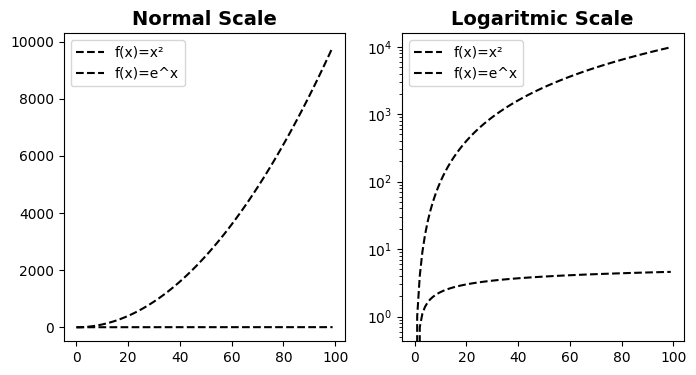

In [48]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,4))

ax[0].set_xscale('linear')
ax[0].set_yscale('linear')
ax[0].set_title('Normal Scale', fontsize=14, fontweight='bold')
ax[0].plot(x, x**2, c= 'k', ls='--', label= r'f(x)=x²')
ax[0].plot(x, np.log(x, where= x>0), c='k', ls='--', label= r'f(x)=e^x')
ax[0].legend()

ax[1].set_xscale('linear')
ax[1].set_yscale('log')
ax[1].set_title('Logaritmic Scale', fontsize=14, fontweight='bold')
ax[1].plot(x, x**2, c= 'k', ls='--', label= r'f(x)=x²')
ax[1].plot(x, np.log(x, where= x>0), c='k', ls='--', label= r'f(x)=e^x')
ax[1].legend()


plt.show()
# El where dentro de np.log gestiona el error del logaritmo en el entorno de 0

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [49]:
fitbit_df = pd.read_csv('../sets/fitbit2.csv')
fitbit_df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [50]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
median_steps_by_month = fitbit_df[['Months','Months_encoded', 'Steps']].\
                                groupby(['Months_encoded','Months']).agg('median')
median_steps_by_month.reset_index(level=1, inplace=True)
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
median_steps_by_workorweekend = fitbit_df[['Months','Work_or_Weekend', 'Steps']].\
                                groupby(['Work_or_Weekend']).agg('median').set_index(pd.Series(['Weekend','Work']))

# añado la media de steps sobre la gráfica de steps
med_steps = fitbit_df['Steps'].mean()

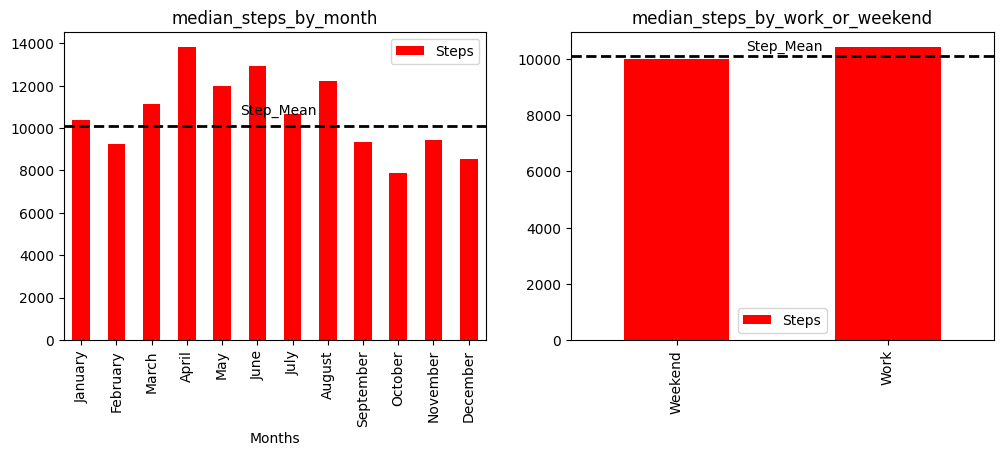

" Dear TA: \n    como he cambiado los títulos de X en el propio DF, no hago uso de xticks, pero entiendo que xticks\n    tal que: \n   \n    name_months = median_steps_by_month['Months']\n    days_week = ['Weekend','Work']\n    ax[0].xticks(np.arange(len(median_steps_by_month['Months']), name_months)))\n    ax[1].xticks(np.arange(len(median_steps_by_month['Work_or_Weekend'], days_week)))\n"

In [51]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))

# Means Horizontal Lines
ax[0].axhline(y=med_steps, color='k', linestyle='--', lw=2)
ax[0].text(4.5,med_steps+500, 'Step_Mean', rotation=0)

ax[1].axhline(y=med_steps, color='k', linestyle='--', lw=2)
ax[1].text(0.33,med_steps+200, 'Step_Mean', rotation=0)

# Labels
median_steps_by_month.plot.bar(ax= ax[0], x='Months',y='Steps',\
                               color='red', title = 'median_steps_by_month')
median_steps_by_workorweekend.plot.bar(ax= ax[1], color = 'red', title = 'median_steps_by_work_or_weekend')

plt.show()

# save img in lab folder
fig.savefig('figure_challenge_2.png')

""" Dear TA: 
    como he cambiado los títulos de X en el propio DF, no hago uso de xticks, pero entiendo que xticks
    tal que: 
   
    name_months = median_steps_by_month['Months']
    days_week = ['Weekend','Work']
    ax[0].xticks(np.arange(len(median_steps_by_month['Months']), name_months)))
    ax[1].xticks(np.arange(len(median_steps_by_month['Work_or_Weekend'], days_week)))
"""

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

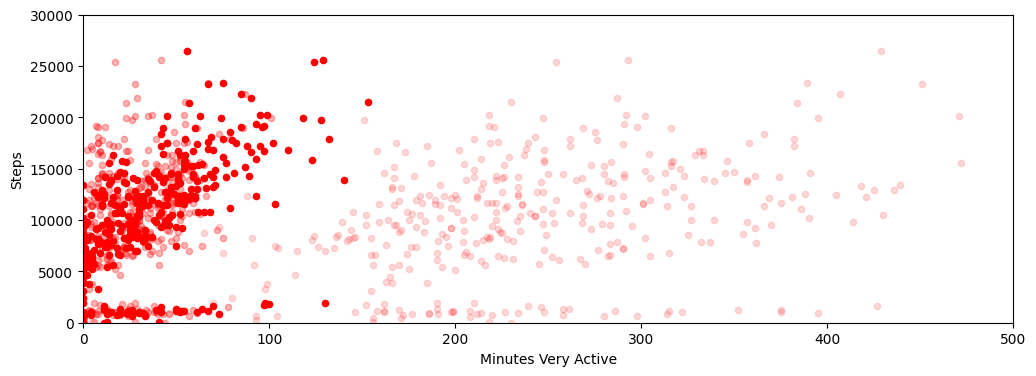

In [52]:
data_to_represent = ['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']
alpha_channel = [0.15, 0.30, 1]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,4))

for i, val in enumerate(data_to_represent):    
    fitbit_df.plot.scatter(ax= ax, x=data_to_represent[i],y='Steps',\
                           color='red', alpha=alpha_channel[i],\
                           xlim=(0,500), ylim=(0,30000))
    
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [53]:
titanic_df = pd.read_csv('../sets/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [20]:
titanic_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [21]:
# NUMERICAL VARIABLES
titanic_numbers_df = titanic_df.select_dtypes(include= ['int64', 'float64'])
titanic_numbers_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [ ]:
titanic

In [22]:
# CATEGORICAL VARIABLES
titanic_categorical_df = titanic_df.select_dtypes(include= 'object')
titanic_categorical_df.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [85]:
#style in seaborn
# sns styles : darkgrid, whitegrid, dark, white, and tick.
# default == darkgrid


#### Use the right visulalization to show the distribution of column `Age`.

[(0.0, 100.0)]

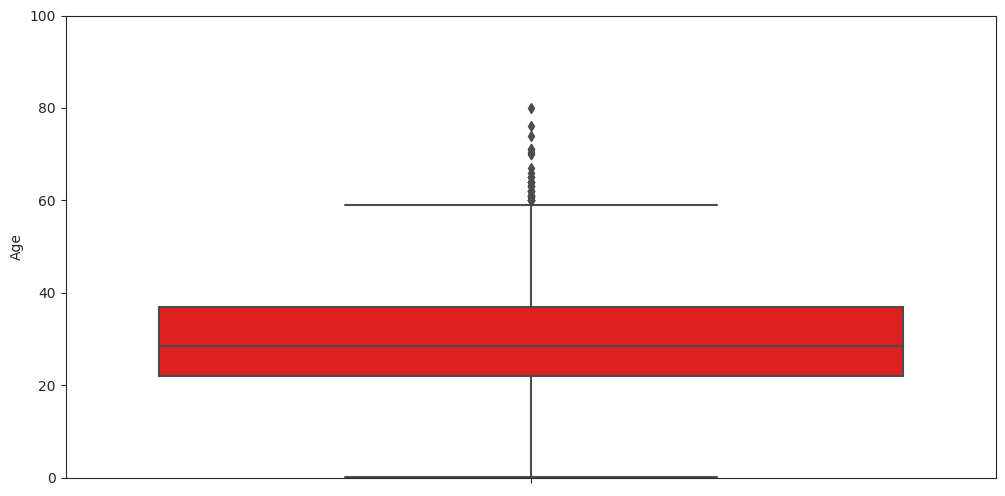

In [102]:
# Seaborn set style and 
fig, ax = plt.subplots(figsize=(12,6))

sns.set_style('ticks')
ax = sns.boxplot(y="Age", data=titanic_numbers_df, color='red')
ax.set(ylim=(0,100))

<AxesSubplot:>

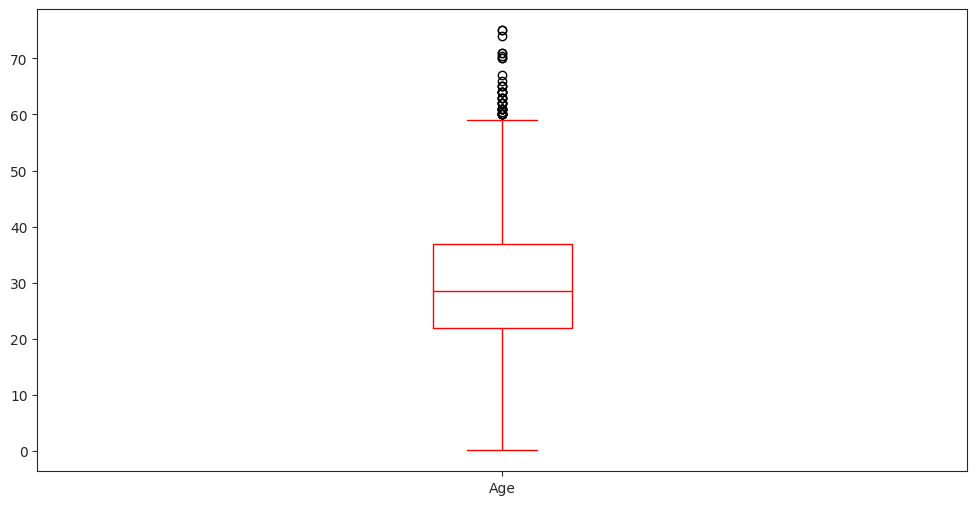

In [101]:
# pandas plot style 
titanic_df['Age'].clip(0,75).plot(kind='box', figsize=(12,6), color='red')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:ylabel='Frequency'>

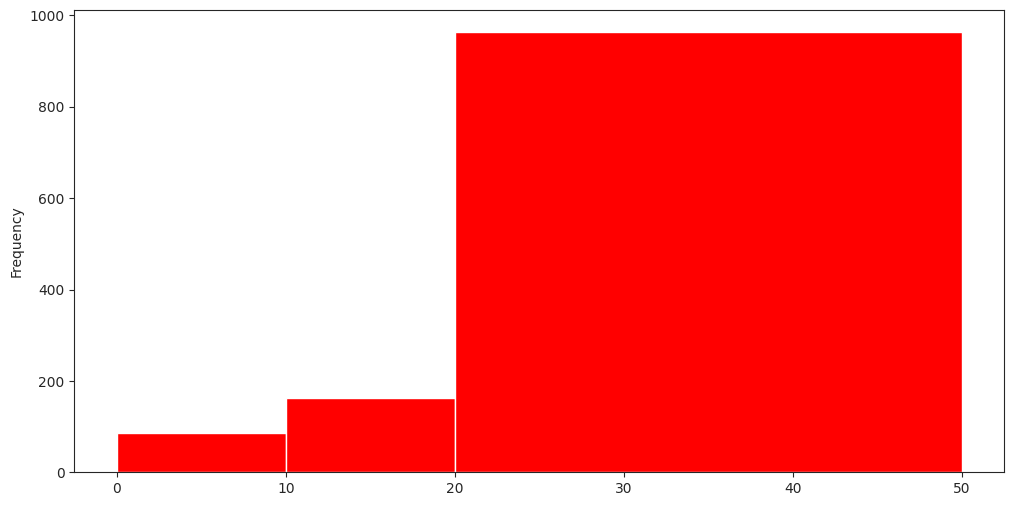

In [99]:
titanic_df['Age'].plot.hist(figsize=(12,6), bins=[0,10,20,50], color='red')

# bins como lista lo que hace es que toma los datos como rangos, devolviendo la distribución de datos entre:
#     0..10
#    10..20 
#    20..50  

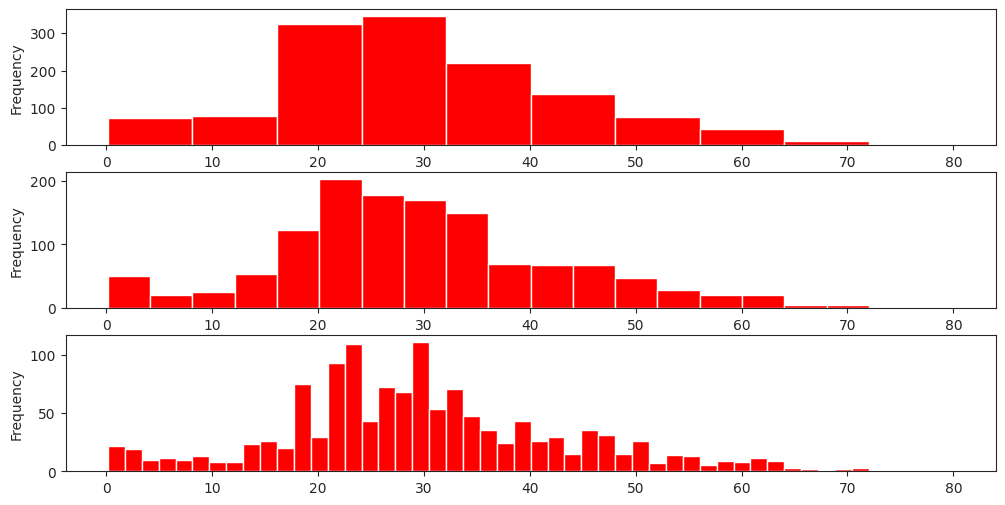

In [106]:
# pandas plot
fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot2grid((3,1), (0,0))
ax2 = plt.subplot2grid((3,1), (1,0))
ax3 = plt.subplot2grid((3,1), (2,0))

for ax,b in zip([ax1, ax2, ax3],[10,20,50]):
    titanic_df['Age'].plot.hist(ax=ax, figsize=(12,6), bins=b, color='red')

#### How does the bin size affect your plot?

In [ ]:
"""
Bin size affects the quantity of bars shown.
bins = 10 --> shows distribution of data in 10 bars
bins= 20 --> distributes data in 20 bins

the less bins, the more a general view of how data is distributed in list you have

In this case, most of people have around 20-30 years old, being the most repeated age early 20s and 30 years old.
"""

#### Use seaborn to show the distribution of column `Age`.

[(0.0, 80.0)]

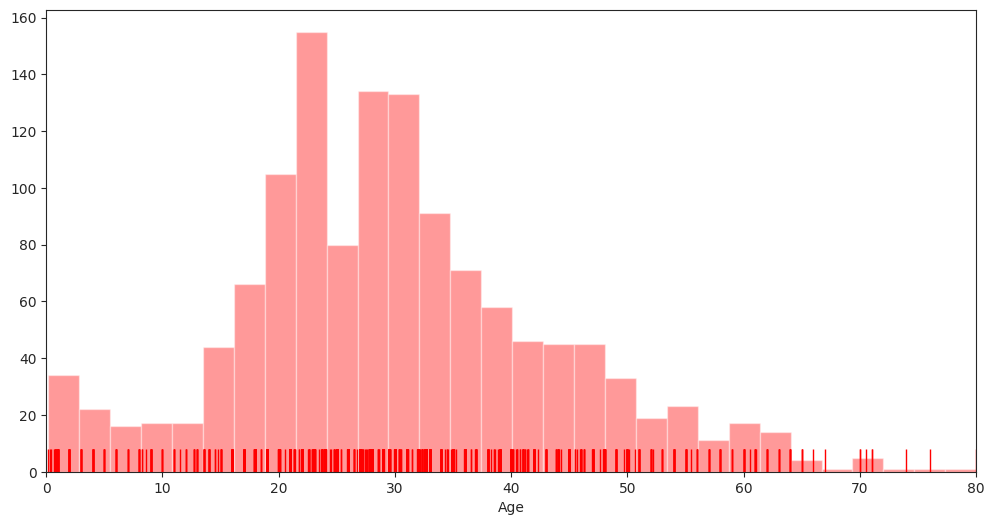

In [113]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style('ticks')

ax = sns.distplot(titanic_df['Age'], kde=False, rug=True, color='red')
ax.set(xlim=(0,80))

# KDE = Kernel density estimation
# Plots encode the density of observations 

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [136]:
titanic_gender_distr = titanic_df['Gender'].value_counts()

titanic_gender_distr.values


array([843, 466])

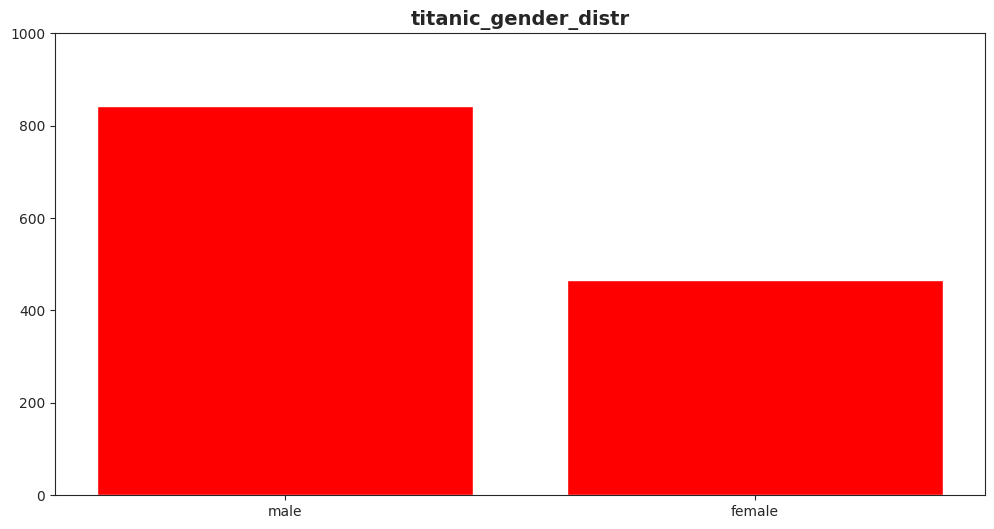

In [144]:
# Method 1 - matplotlib

# 1 ## Creating series to plot and creating 
titanic_gender_distr = titanic_df['Gender'].value_counts()
x = titanic_gender_distr.index
y = titanic_gender_distr.values

# 2 ## Creating figure and axis
fig, ax = plt.subplots(figsize=(12,6))

ax.set(ylim= [0,1000])
ax.set_title('titanic_gender_distr', fontsize=14, fontweight='bold')
ax.bar(x, y, color='red')

plt.show()

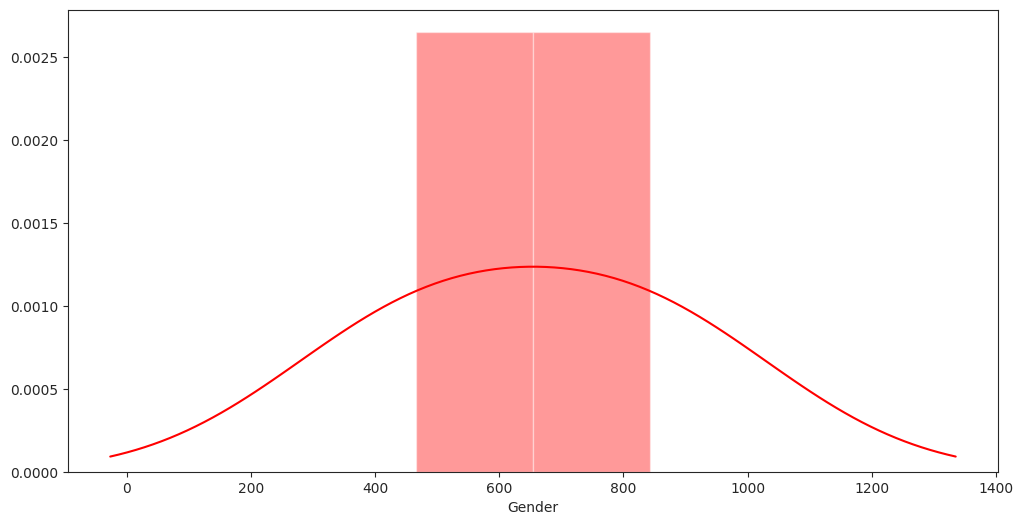

In [151]:
# Method 2 - seaborn
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.distplot(titanic_gender_distr, color='red')

#### Use the right plot to visualize the column `Pclass`.

In [170]:
titanic_df.head(5)
# titanic_df['Pclass'].value_counts()
# Pclass == passenger sailing class 

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


<AxesSubplot:>

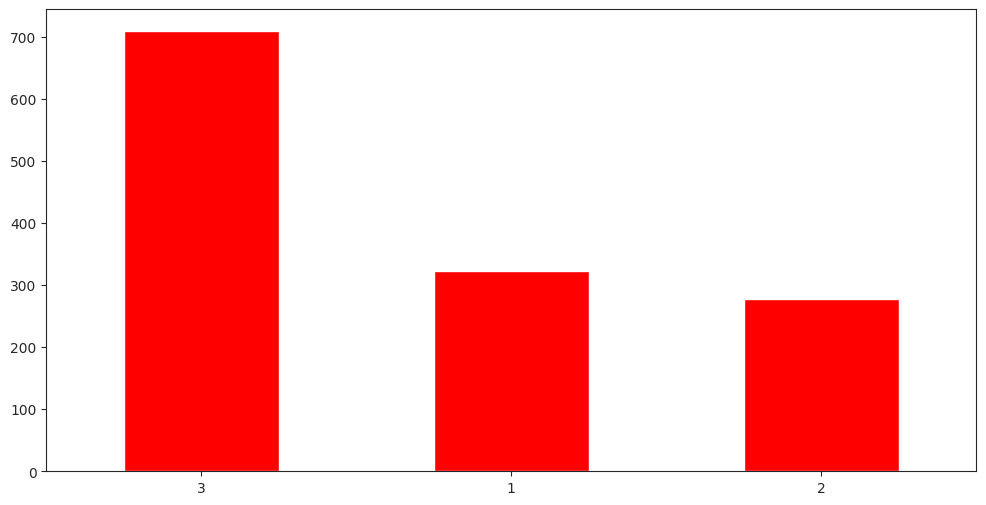

In [213]:
# Method - Pandas
titanic_pclass_distr = titanic_df['Pclass'].value_counts()

titanic_pclass_distr.plot.bar(figsize=(12,6), color='red', rot=0)

In [ ]:
"""
Quizá otra forma sería con una stacked bar o haciendo que las bar sean porcentajes?
"""

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

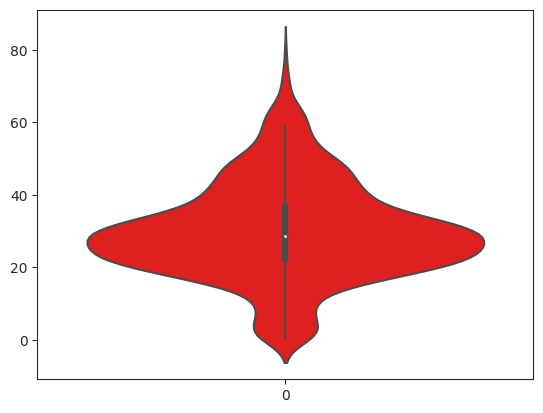

In [226]:
sns.violinplot(data=titanic_df['Age'], color='red')

In [ ]:
"""
Boxplot (show above) and violinplot allows for a quick visualization of stats of a column
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Avg Age = 25..30
Most ages are between 20..30
Nearly nobody was above 75
There were more children than teens in the boat
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:ylabel='Frequency'>

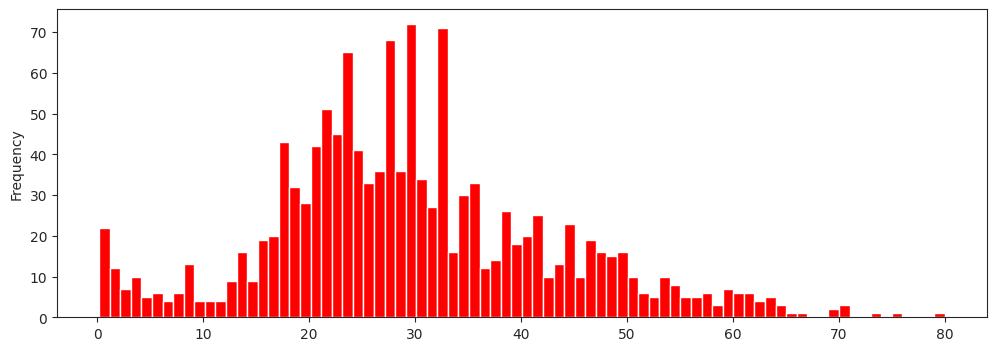

In [224]:
# Distribution --> bins

titanic_df['Age'].plot.hist(figsize=(12,4), bins=80, color='red')

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Most repeated age --> 30 years old
Above 65 the number of people is residual.
Most minors were babies
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [223]:
titanic_df[['Fare', 'Age']].head()

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0


<AxesSubplot:xlabel='Age', ylabel='Fare'>

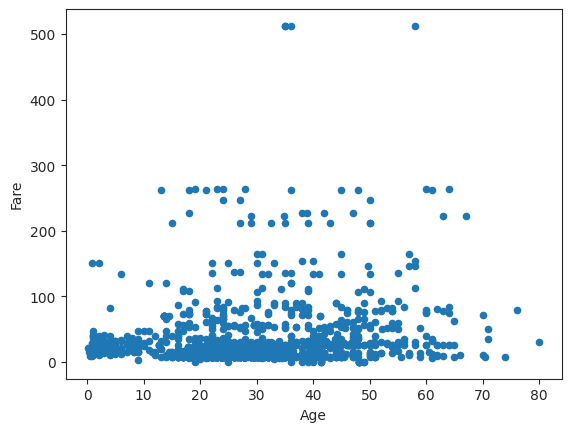

In [236]:
# Method 1 - matplotlib

titanic_df[['Fare', 'Age']].plot.scatter(x='Age', y='Fare')

<AxesSubplot:>

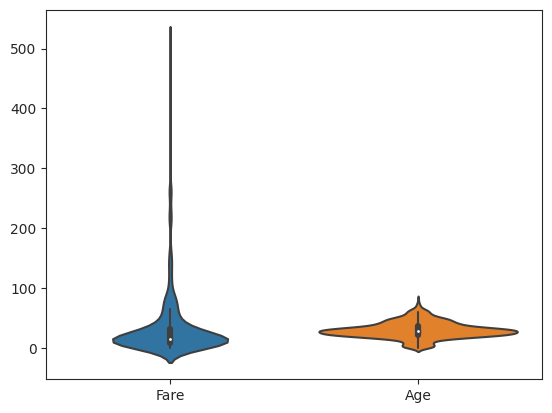

In [229]:
# Method 2 - seaborn


#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

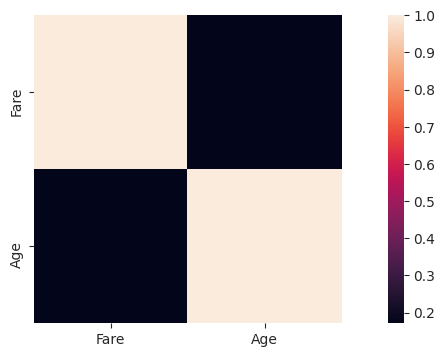

In [240]:
# Compute the correlation matrix
corr = titanic_df[['Fare', 'Age']].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, square=True, )

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [241]:
# your code here

,Fare,Age
Fare,1.000000,0.171355
Age,0.171355,1.000000


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here